# fastai course : lesson1 practice 

This exercise is inspired in the [lesson 1](https://course.fast.ai/videos/?lesson=1) from fastai course 

##  Training Insect Classifier

In [ ]:
from fastai.vision import *

In [ ]:
datasets = Path('../datasets/insects')
datasets.ls()

[PosixPath('../datasets/insects/flies.csv'),
 PosixPath('../datasets/insects/yellow_jacket.csv'),
 PosixPath('../datasets/insects/scarab_beetle.csv'),
 PosixPath('../datasets/insects/.DS_Store'),
 PosixPath('../datasets/insects/mosquito.csv'),
 PosixPath('../datasets/insects/ant.csv'),
 PosixPath('../datasets/insects/butterfly.csv'),
 PosixPath('../datasets/insects/honeybee.csv'),
 PosixPath('../datasets/insects/spider.csv'),
 PosixPath('../datasets/insects/dragonfly.csv'),
 PosixPath('../datasets/insects/wasp.csv')]

### Reading csv files and downloading images

In [ ]:
# iterate over the csv files  and download images 
for insect_class_csv in datasets.ls():    
    if(insect_class_csv.is_file()):
        # create folder name assuming file name is the insect class name

        class_name = insect_class_csv.name.replace(".csv","")    
        path = Path(insect_class_csv.parent)
        dest = path/class_name    
        dest.mkdir(parents=True, exist_ok=True)    

        # call fast.ai function that reads image urls line by line 
        # and download them in the respective directory
        download_images(insect_class_csv, dest, max_pics=200, max_workers=0)

In [ ]:
for c in datasets.ls():
    print(c)
    if not(c.is_file()):
        verify_images(path/c, delete=True, max_size=500)

../datasets/insects/yellow_jacket
../datasets/insects/flies.csv
../datasets/insects/scarab_beetle
../datasets/insects/yellow_jacket.csv
../datasets/insects/scarab_beetle.csv
../datasets/insects/.DS_Store
../datasets/insects/flies
../datasets/insects/mosquito.csv
../datasets/insects/ant.csv
../datasets/insects/butterfly.csv
../datasets/insects/honeybee.csv
../datasets/insects/spider.csv
../datasets/insects/dragonfly.csv
../datasets/insects/wasp.csv


## Defining fast.ai dataset structure for images

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

## Inspecting transformers

Transformers are functions that modifies the input images generating new versions of the image with small changes.At the training phase this is usefull to make to classifier more robust.

In [ ]:
tfms = get_transforms()
tfms

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.1), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do

### Transformers applied to the training set

In [ ]:
tfms[0]

[RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
 RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True),
 RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
 RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
 RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.1), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
 RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
 RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do_run=Tr

### Transformers applied to the validation set

In [ ]:
tfms[1]

[RandTransform(tfm=TfmCrop (crop_pad), kwargs={}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True)]

## Inspecting classes

In [ ]:
data.classes

['flies', 'scarab_beetle', 'yellow_jacket']

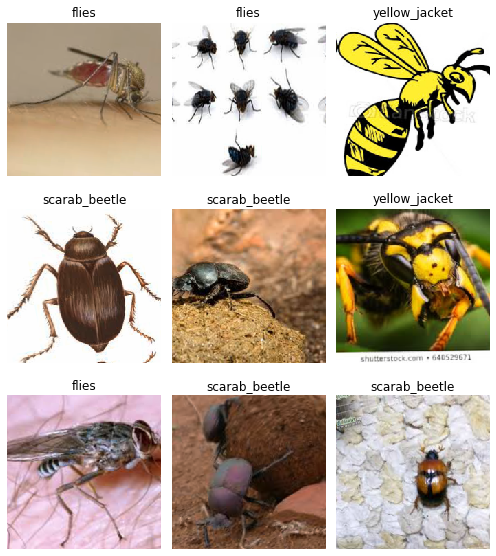

In [ ]:
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['flies', 'scarab_beetle', 'yellow_jacket'], 3, 384, 96)

## Training the actual classifier

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/arian.pasquali/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.536975,0.377698,0.125000,02:13
1,0.902937,0.327153,0.083333,02:16
2,0.637974,0.366310,0.093750,02:05
3,0.501264,0.378499,0.083333,02:20


In [ ]:
learn.save('stage-1')

## Interpreting classification results 

In [ ]:
interp = ClassificationInterpretation.from_learner(learn, )
interp.most_confused(min_val=2)

[('scarab_beetle', 'flies', 3),
 ('flies', 'scarab_beetle', 2),
 ('yellow_jacket', 'flies', 2)]

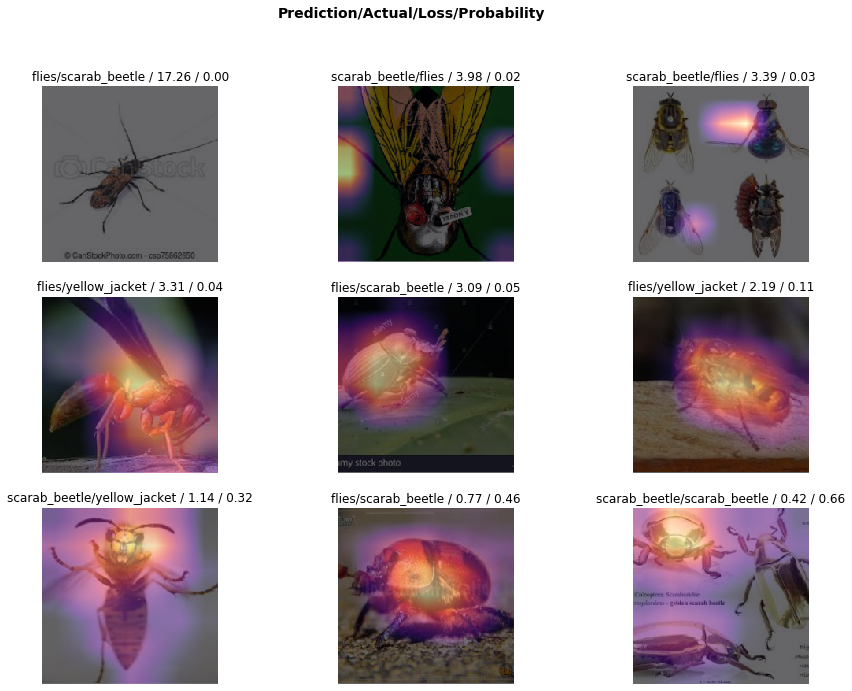

In [ ]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=True)

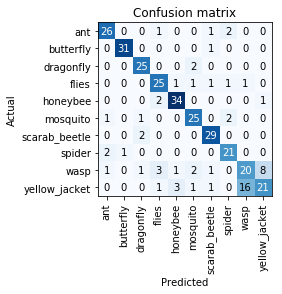

In [ ]:
interp.plot_confusion_matrix()

### Unfreezing, fine-tuning, and learning rates
Since our model is working as we expect it to, we will unfreeze our model and train some more.

In [ ]:
learn.unfreeze()

In [ ]:
# Cold try with one cycle
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.183354,1.433309,0.187500,03:09


Let's take a step back and load previous version of model and try to find the best learning rate from there.

In [ ]:
learn.load('stage-1');
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.recorder.plot_lr()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

In [ ]:
learn.export()

## Inspect and clean dataset

In [ ]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [ ]:
from fastai.widgets import *

ds, idxs = DatasetFormatter().from_toplosses(learn)

In [ ]:
# Don't run this in google colab or any other instances running jupyter lab.
# If you do run this on Jupyter Lab, you need to restart your runtime and
# runtime state including all local variables will be lost.
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

In [ ]:
ds, idxs = DatasetFormatter().from_similars(learn)

Getting activations...


Computing similarities...


In [ ]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())